# Algerian Forest Fire Prediction [Click here for Dataset](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#)
--------

<div>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTOkiymeeIjvwaQssl0bHVrp2rvPQ_qjtMxCw&usqp=CAU" width="700"/>
</div>

### Life Cycle of Machine Learning Project

1. **Business context and defining the Problem Statement**  
2. **Data Gathering and understanding**  
3. **Data Preparation and Data Cleaning**  
4. **Exploratory Data Analysis**  
5. **Feature Engineering and Selection**  
6. **Data preparation of modelling**  
7. **Model building**  
8. **Model validation and Evaluation**  
9. **Prediction and Model Deployment**  

### 1. Problem Statement

#### The dataset comprises of different attributes associated with forest fire occured at algerian forests from Jun, 2012 to Sep, 2012. Our Aim is to answer the folowing questions:

- What is threshold temperature (celsius) for Fire to occur?
- At what relative humidity (%), fire has occured as per previous data?
- What is the wind speed (km/h) during forest fires and effect of wind speed on fire?
- What is the rain (in mm) during forest fires and effect of rain on fire?

### 2. Data Gathering and understanding

The dataset is downloaded from [Link](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#)

### Attributes Information

1. **Date:** Day, Month (june - Sep) and Year 2012
2. **Temp:** temperature noon (temperature max) in Celsius degrees: 22 to 42
3. **RH:** Relative Humidity in %: 21 to 90
4. **Ws:** Wind speed in km/h: 6 to 29
5. **Rain:** total day in mm: 0 to 16.8

**FWI Components**

6. **Fine Fuel Moisture Code (FFMC):** index from the FWI system 28.6 to 92.5
7. **Duff Moisture Code (DMC):** index from the FWI system 1.1 to 65.9
8. **Drought Code (DC):** index from the FWI system 7 to 220.4
9. **Initial Spread Index (ISI):** index from the FWI system 0 to 18.5
10. **Buildup Index (BUI):** index from the FWI system 1.1 to 68
11. **Fire Weather Index (FWI) Index:** 0 to 31.1
12. **Classes:** two classes, namely fire and not fire

### 3. Data Preparation and Data Cleaning

Steps include:
1. Import necessary libraries for data analysis
2. Reading Dataset (e.g. .csv, .xlsx, .json, .txt etc.) in Pandas
3. checkout the dataset info like (no. of columns, no. of rows, datatypes of attributes/features, shape of dataset, missing values, duplicate values etc.) 
4. Fixing Structural errors
5. Handling missing values
6. Managing unwanted ouliers (if any)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading particular CSV file in pandas

df = pd.read_csv(r"D:\Data Science\Datasets\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
df[118:128]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


As the dataset comprises data of two different regions named as **Bejaia** (upto row index no. 121) and **Sidi-Bel Abbes** (from row index no. 122 upto end of dataset). So, row no. 122 and 123 needs to removed and indexes are to reset for resulting dataset.

In [4]:
df = df.drop([122,123])

In [5]:
df = df.reset_index(drop = True)

In [6]:
# Adding two regions in a column name [Region] in dataset

# 0 for Bejaia region
# 1 for Sidi-Bel Abbes region

df.loc[0:121,['Region']] = '0'
df.loc[122: ,['Region']] = '1'

In [7]:
# striiping off whitespaces in  column names

df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
# striiping off whitespaces in  Classes datapoints

df['Classes'] = df['Classes'].str.strip()

In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [11]:
# chencking for missing values

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [12]:
# checking for duplicated entries

df[df.duplicated()=='True']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [13]:
# handling unordered data and missing values at row index no. 165

df.loc[df['FWI']=='fire   ',['DC','ISI','BUI','FWI','Classes']] = ['14.6','9','12.5','10.4','fire']

In [14]:
#df.loc[[165]]

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [17]:
# Feature encoding for Classes column

# 1 for fire
# 0 for not fire

df.loc[df['Classes']=='fire','Classes'] = '1'
df.loc[df['Classes']=='not fire','Classes'] = '0'

In [18]:
df['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [19]:
df.shape

(244, 15)

In [20]:
df.size

3660

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


**Converting dtypes from categorical to numerical**

In [22]:
num_col = df.columns[3:13]

for i in num_col:
    df[i] = df[i].astype('float64')

In [23]:
df['Date'] = pd.to_datetime(df[['year','month','day']])
df.drop(['day','month','year'],axis = 1,inplace = True)

In [24]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    float64       
 1   RH           244 non-null    float64       
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    object        
 11  Region       244 non-null    object        
 12  Date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 24.9+ KB


In [26]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


#### Creating a copy of dataframe from original dataframe

In [27]:
data = df.copy()
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


### 4. Exploratory Data Analysis

#### Statistical Analysis

In [28]:
# statistical analysis using describe menthod

data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [29]:
data[data['Temperature'] == data['Temperature'].max()]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
199,42.0,24.0,9.0,0.0,96.0,30.3,76.4,15.7,30.4,24.0,1,1,2012-08-17


In [30]:
data.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'Date'],
      dtype='object')

In [31]:
num_col = [i for i in data.columns if  data[i].dtype=='float64']

In [32]:
cat_col = [i for i in data.columns if  data[i].dtype=='object']

In [33]:
for cat in cat_col:
    a = data[cat].value_counts()
    print(cat)
    print(a)
    print('-'*10)

Classes
1    138
0    106
Name: Classes, dtype: int64
----------
Region
0    122
1    122
Name: Region, dtype: int64
----------


### Univariate Analysis

The puspose of univariate analysis is to understand the distribution value of variables

### Numerical Features 

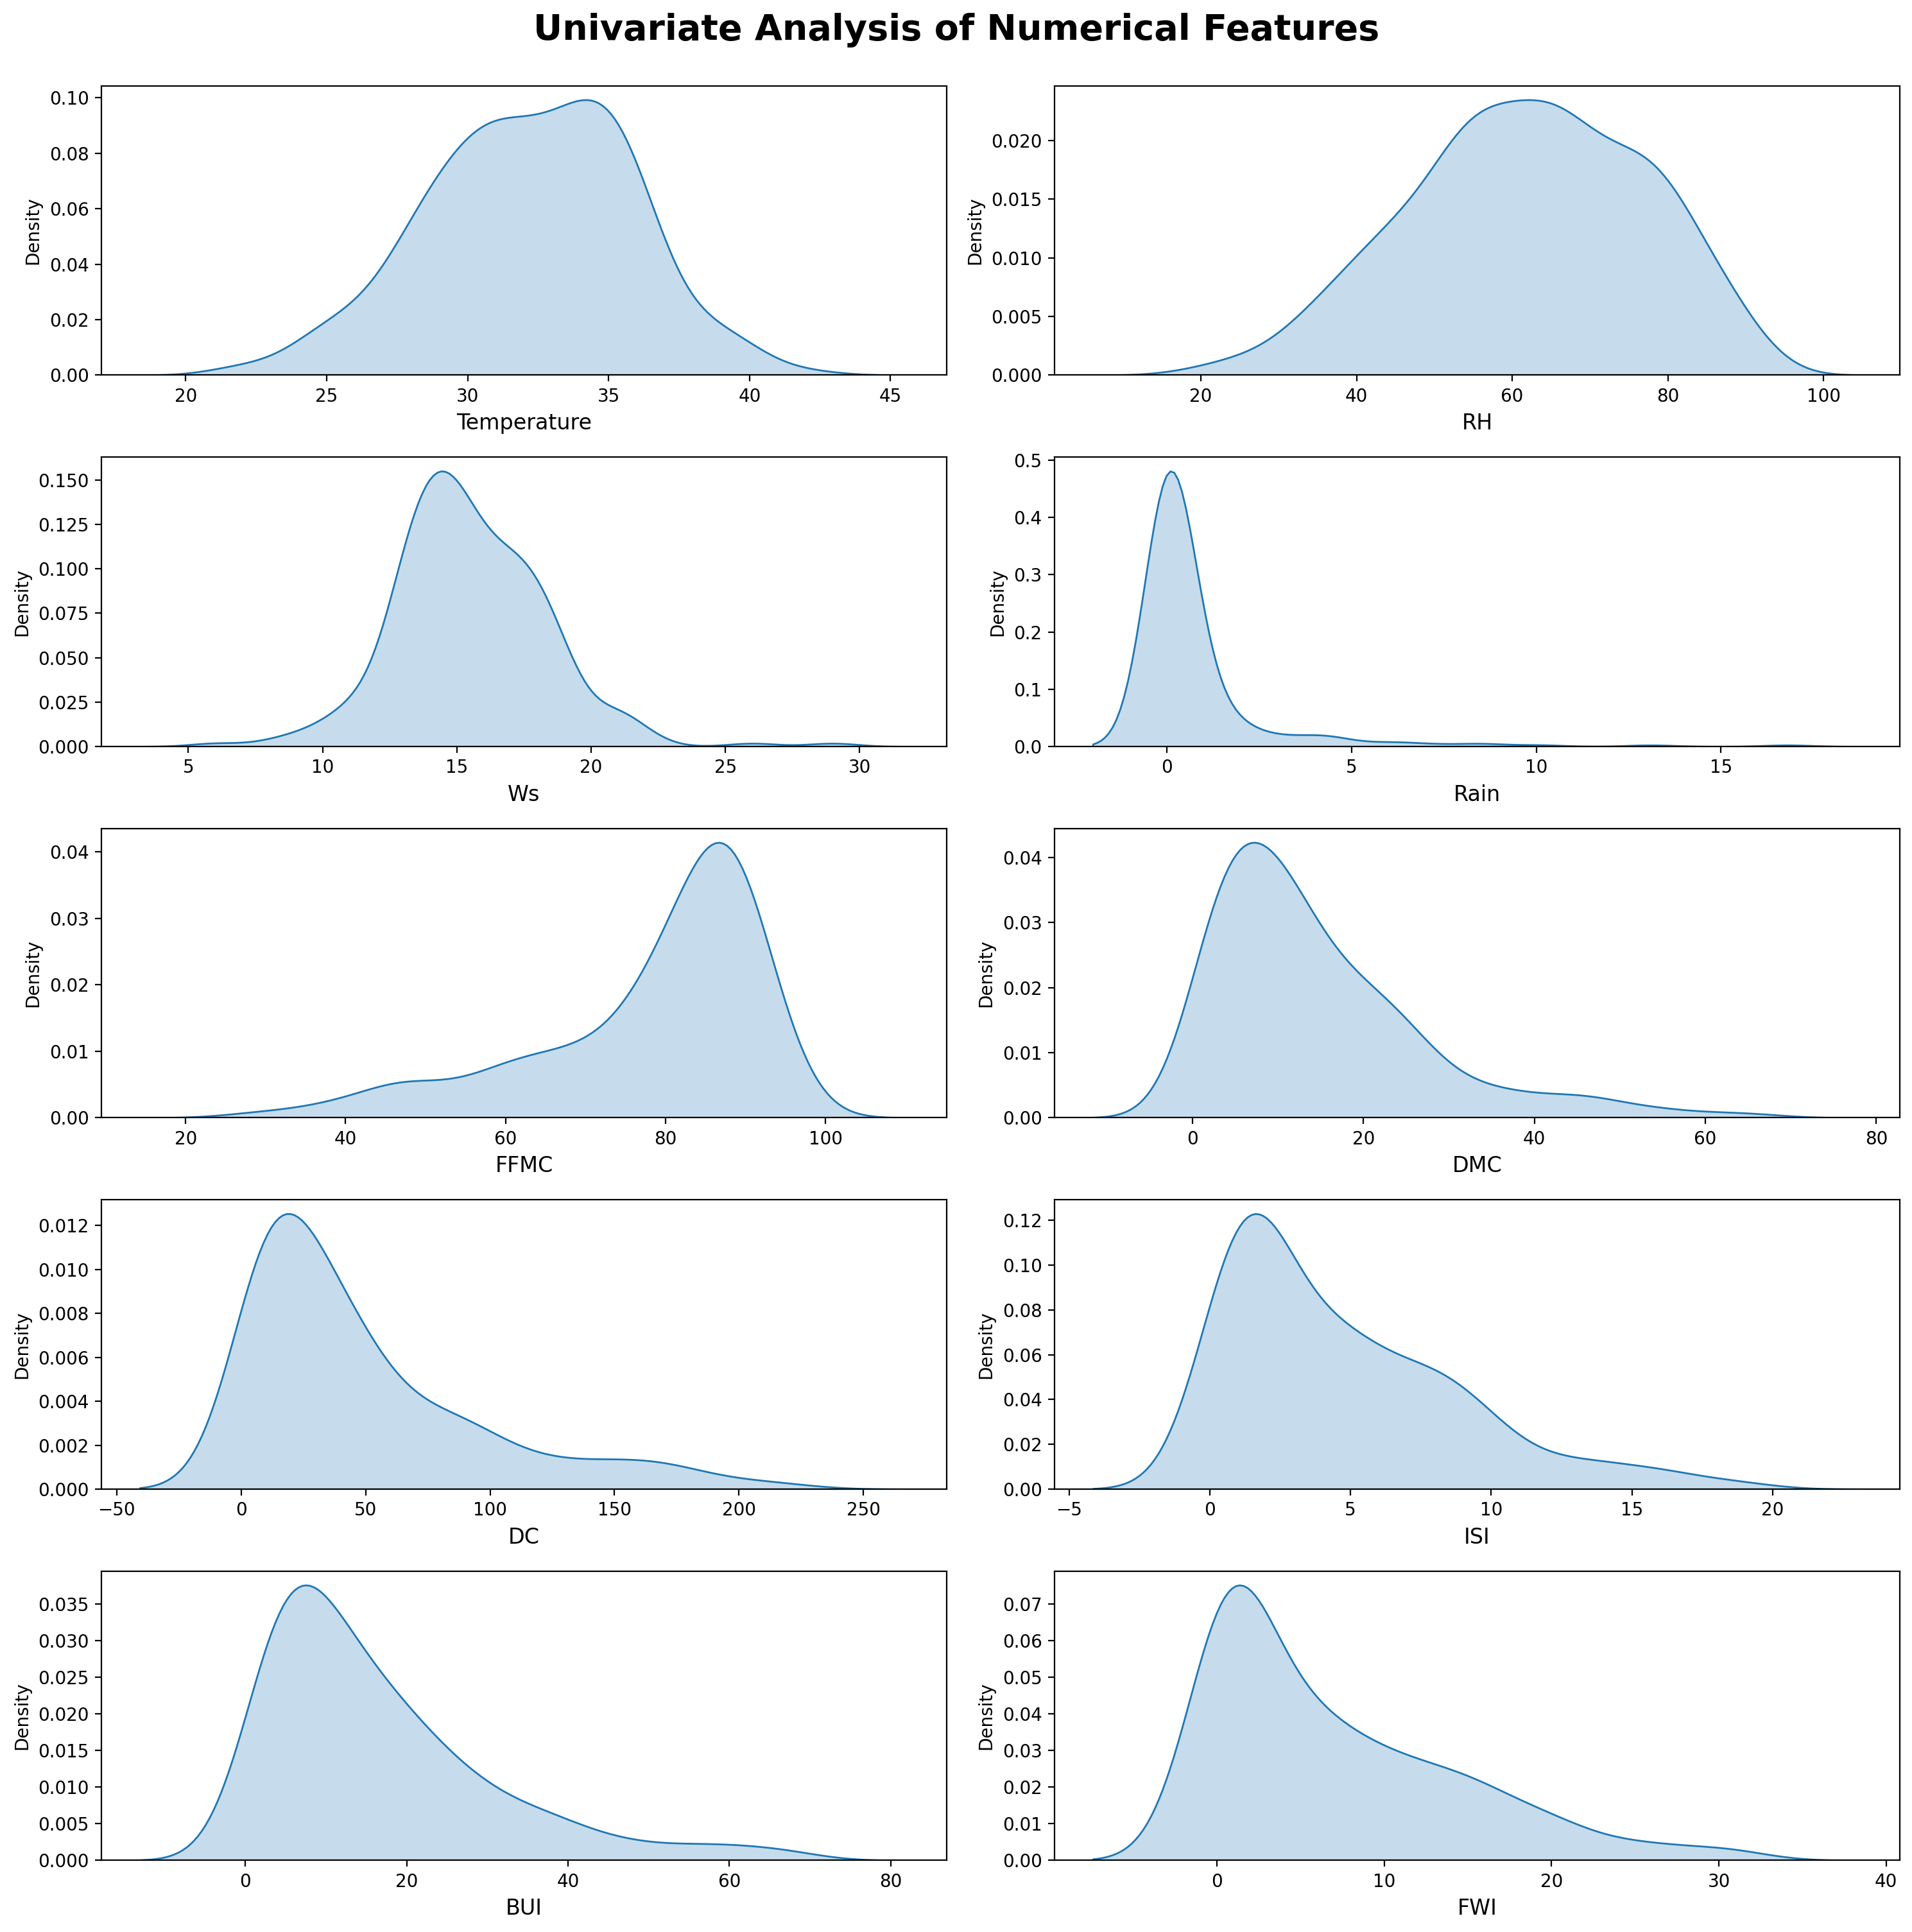

In [34]:
n = 1
plt.figure(figsize=(15, 15),dpi=200)
plt.suptitle('Univariate Analysis of Numerical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1)

for i in num_col:
    
    plt.subplot(5,2,n)
    sns.kdeplot(x = data[i],shade = True)
    plt.tight_layout()
    plt.xlabel(i, fontdict={'fontsize':12})
    n+=1

###### Observations:

1. Features like Ws, Rain, DMC, DC, ISI, BUI and FWI are right skewed (log normal distribution)
2. Features like Temperature, RH, FFMC are left skewed

### Categorical Features

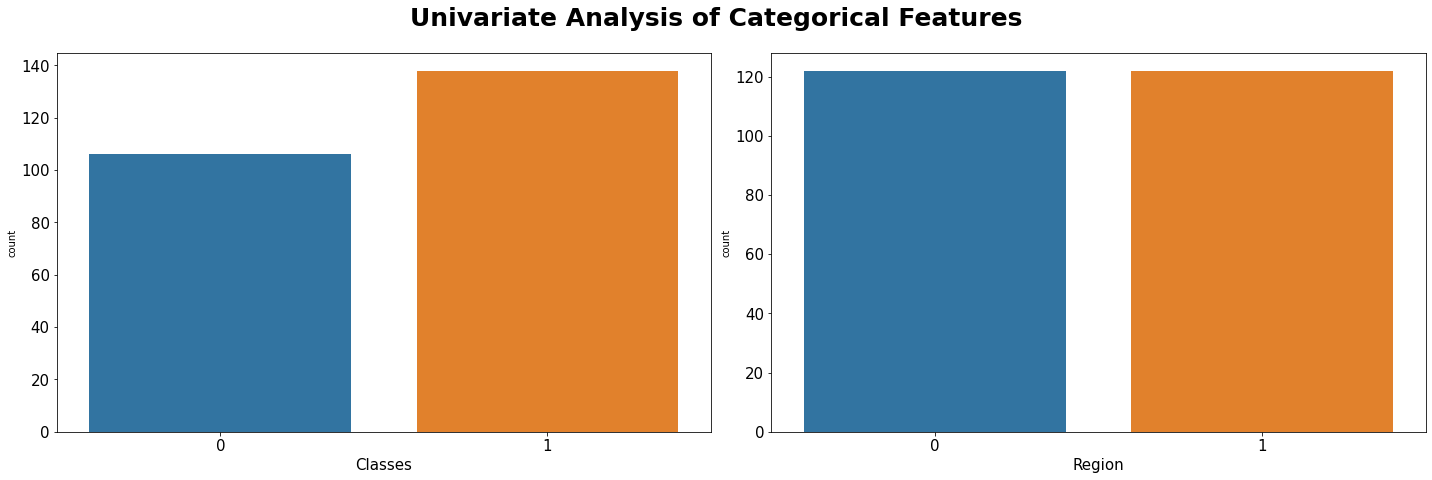

In [35]:
n = 1
plt.figure(figsize=(20, 30))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize = 25, fontweight = 'bold',alpha = 1, y = 1)

# 0 for Bejaia region
# 1 for Sidi-Bel Abbes region
#Region = ['Bejaia', 'Sidi-Bel Abbes']

# 1 for fire
# 0 for not fire
#Classes = ['Not Fire', 'Fire']

for i in cat_col:
    
    plt.subplot(5,2,n)
    sns.countplot(x = data[i])
    plt.tight_layout()
    plt.xlabel(i, fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    
    n+=1

### Multivariate Analysis

- It is analysis of correleation of more than one varaibles with each other

### Check Multicollinearity in Numerical Features

In [36]:
# checking the covariance of features

data.cov()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.111931,9.148506,23.553987,15.300965
RH,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.165754,-42.561327,-73.916459,-64.178446
Ws,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.203135,0.142964,1.209369,0.708851
Rain,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.258988,-2.889611,-8.501670,-4.823366
FFMC,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.044709,44.124525,120.185186,73.640607
DMC,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.552604,34.856991,172.521016,80.407612
DC,64.111931,-156.165754,10.203135,-28.258988,344.044709,515.552604,2267.632245,99.696270,636.831657,260.718118
ISI,9.148506,-42.561327,0.142964,-2.889611,44.124525,34.856991,99.696270,17.260932,37.841354,28.467868
BUI,23.553987,-73.916459,1.209369,-8.501670,120.185186,172.521016,636.831657,37.841354,201.686818,90.399916
FWI,15.300965,-64.178446,0.708851,-4.823366,73.640607,80.407612,260.718118,28.467868,90.399916,55.180617


In [37]:
# checking the correlation of features

data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000


In [38]:
# checking the skewness of features

data.skew()

Temperature   -0.196309
RH            -0.237964
Ws             0.545881
Rain           4.579071
FFMC          -1.325633
DMC            1.527652
DC             1.479042
ISI            1.126950
BUI            1.458466
FWI            1.143243
Classes       -0.266220
Region         0.000000
dtype: float64

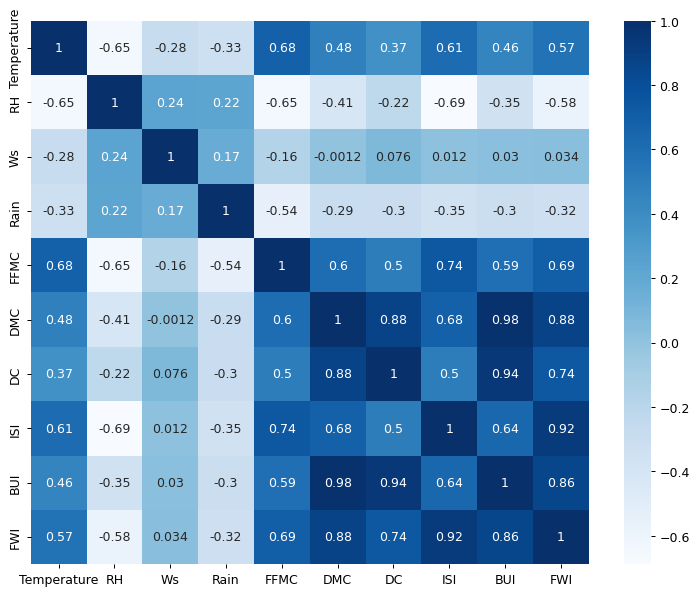

In [39]:
plt.figure(figsize=(10,8),dpi=90)
sns.heatmap(df[num_col].corr(),annot=True,cmap='Blues')
plt.show()

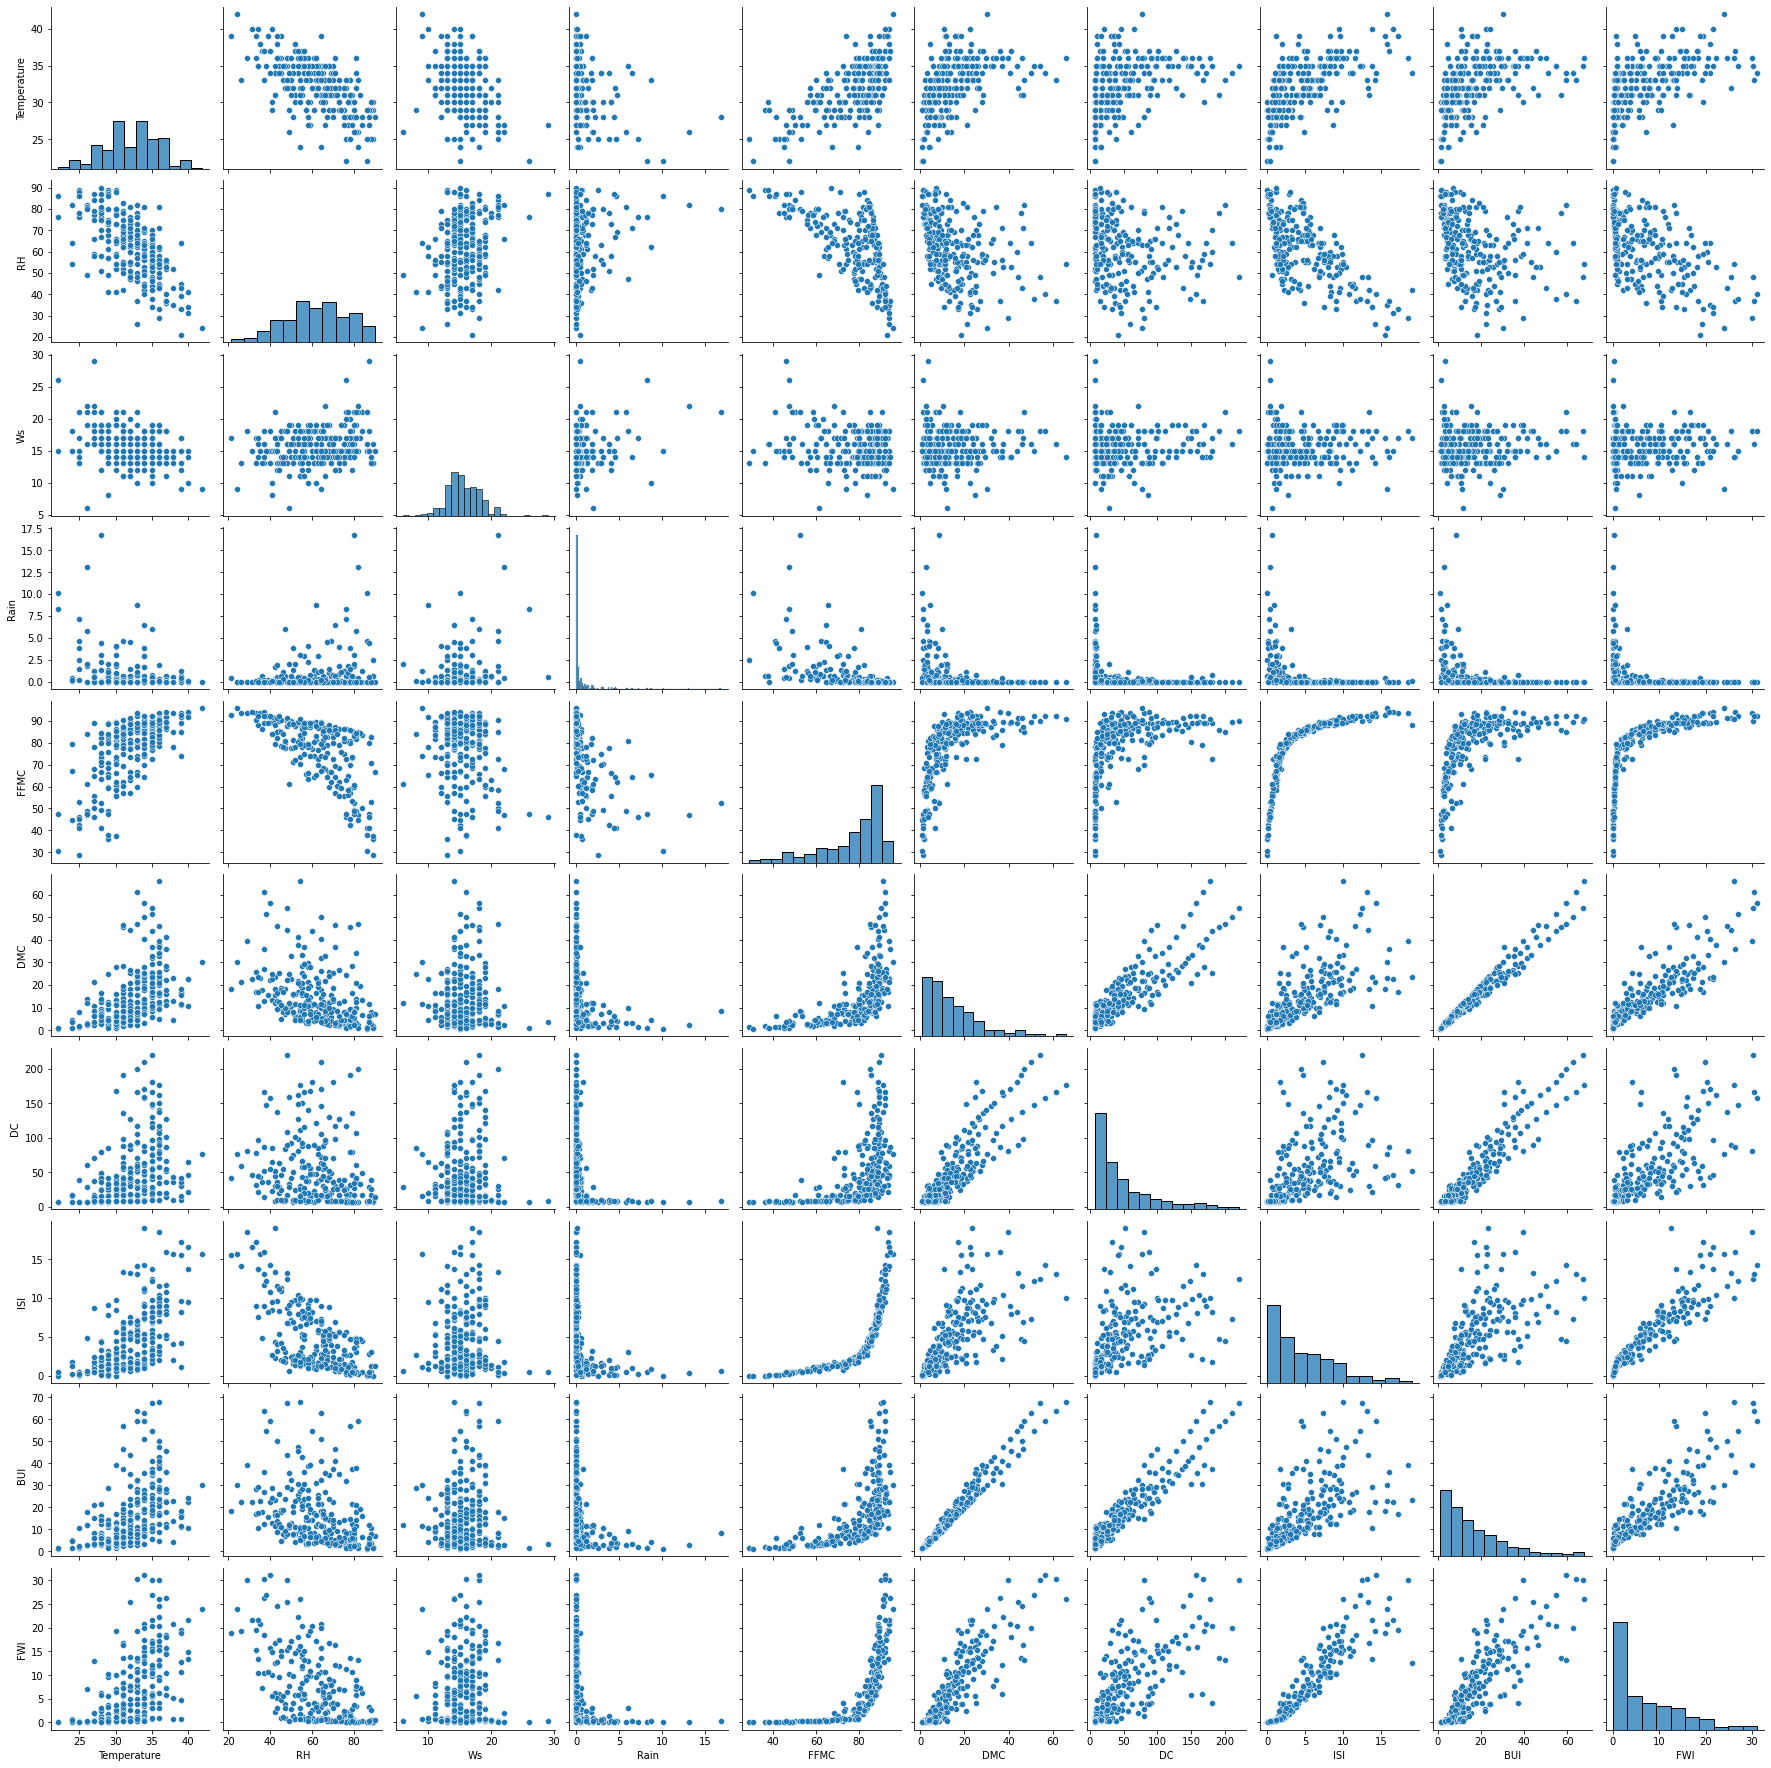

In [40]:
# plotting pairplot to visaulize correlation

sns.pairplot(data)

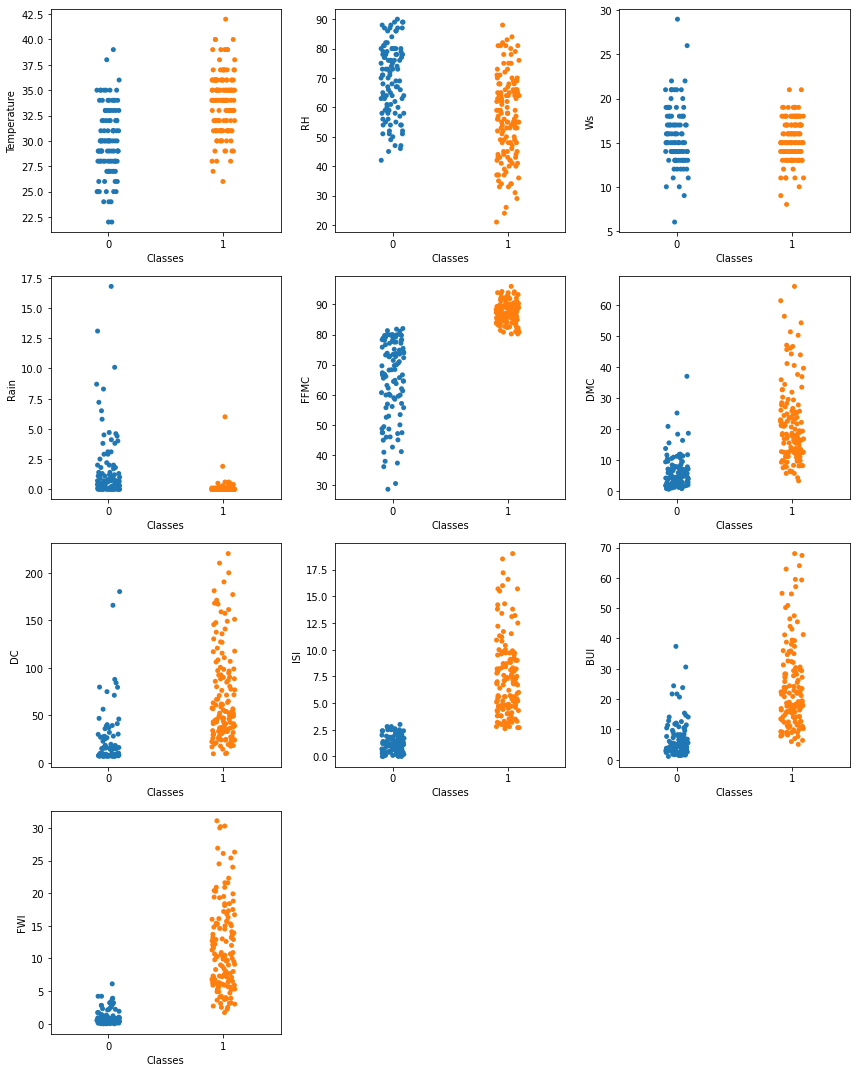

In [41]:
# plotting strip plot

plt.figure(figsize = (12,15))
n = 1
for i in num_col:
    plt.subplot(4,3,n)
    sns.stripplot(y= data[i],x= 'Classes',data = data)
    n+=1
    plt.tight_layout()

### Ovservation

- Temperature remain between 28 - 38 for most of the fires
- Windspeed remain between 13 - 20 for fire regions
- FFMC lies between 80 - 90
- DMC lies between 5 - 40
- DC lies between 10 - 150
- ISI lies between 2.5 - 12.5
- BUI lies between 10 - 40
- FWi lies between 2 - 23

### Observation:

- Ws, Rain, FFMC, DMC, DC and BUI Contains outliers 

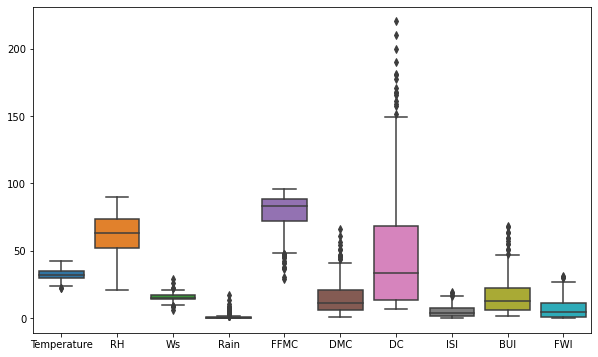

In [42]:
## Boxplot before outliers
plt.figure(figsize=(10,6))
sns.boxplot(data = data)
plt.show()

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

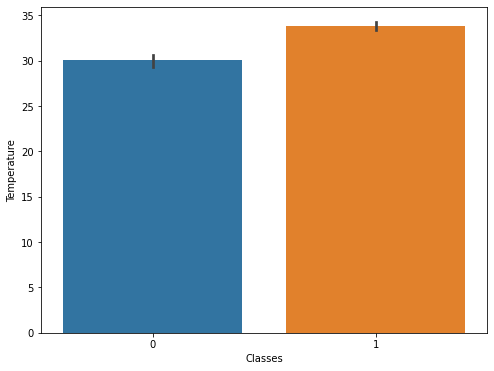

In [43]:
## plottin barplot

plt.figure(figsize=(8,6))
sns.barplot(x = 'Classes', y = 'Temperature', data = data)

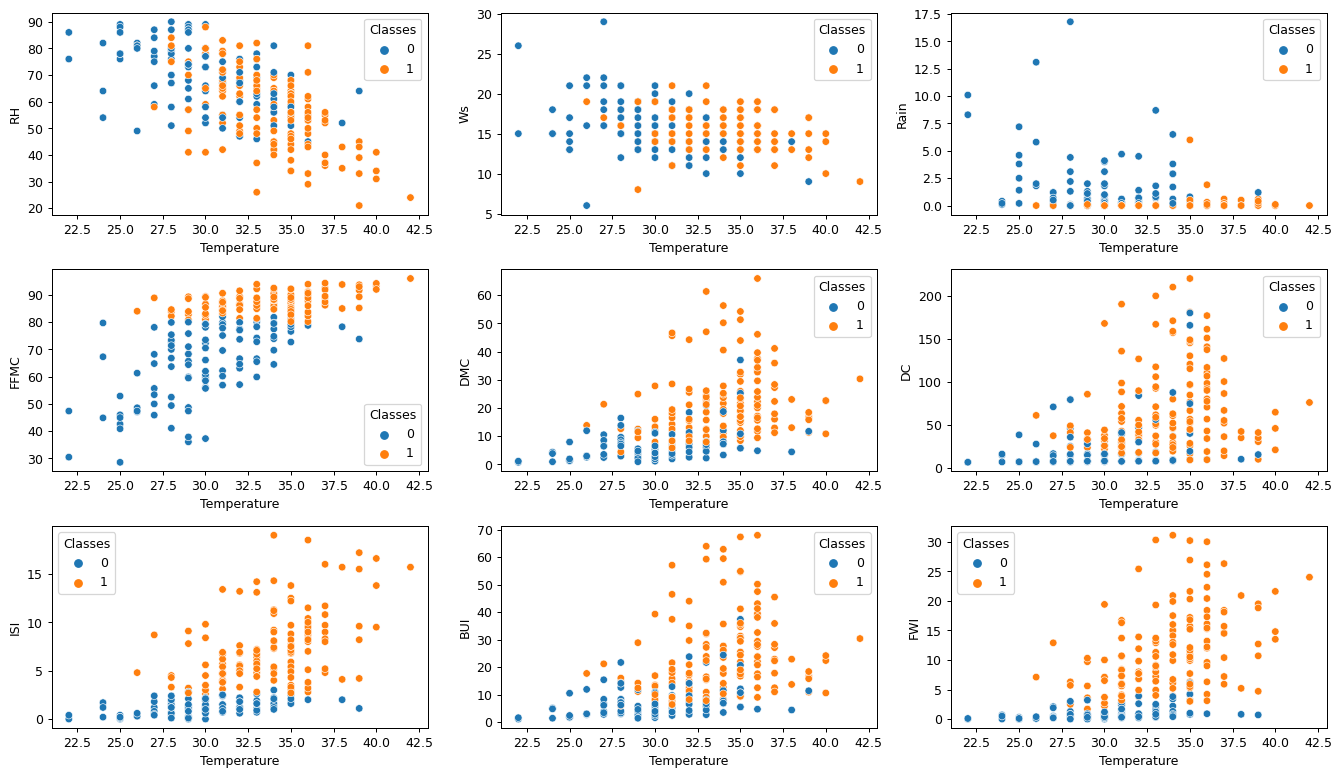

In [44]:
plt.figure(figsize=(15,14),dpi=90)
n=1
for i in num_col[1:]:
    plt.subplot(5,3,n)
    sns.scatterplot(x = 'Temperature', y = i, data = data,hue = 'Classes')
    n+=1
    plt.tight_layout()

### Final Report:

1. For most of the fire regions :
    - Temperature remain between 28 - 38
    - Windspeed remain between 13 - 20
    - FFMC lies between 80 - 90
    - DMC lies between 5 - 40
    - DC lies between 10 - 150
    - ISI lies between 2.5 - 12.5
    - BUI lies between 10 - 40
    - FWi lies between 2 - 23
    

### Feature Engineering and Selection

In [45]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


In [46]:
# Dependent Features
X = data.iloc[:,1:-1]

In [47]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [48]:
# Independent Features
y = data.iloc[:,0]

In [49]:
y.head()

0    29.0
1    29.0
2    26.0
3    25.0
4    27.0
Name: Temperature, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
len(X_train),len(X_test),len(y_train),len(y_test)

(163, 81, 163, 81)

In [53]:
# standardize or feature scaling of dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)

In [55]:
X_test = scaler.transform(X_test)

### Model Training

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
regression = LinearRegression()

In [58]:
regression.fit(X_train,y_train)

LinearRegression()

In [59]:
## print coefficients
regression.coef_

array([-1.05126674, -0.48159084,  0.11938767,  1.82417191,  0.94467874,
        0.67540664,  0.17325427, -1.25422021,  0.0537007 , -0.23927078,
       -0.00511072])

In [60]:
# print intercepts
regression.intercept_

31.98159509202454

In [61]:
y_pred = regression.predict(X_test)

In [62]:
y_pred

array([33.04281582, 34.18373317, 33.94262556, 33.12802489, 36.58081437,
       32.54990698, 35.21895989, 27.32175238, 30.96985655, 29.60339718,
       29.36216075, 33.3713269 , 33.9660541 , 33.37413504, 34.21146262,
       32.16667325, 37.06595141, 25.21346832, 32.29221418, 33.54538576,
       30.91440937, 28.43873771, 35.06373488, 28.67822485, 36.46752406,
       26.81905285, 32.74394806, 33.29778191, 32.84197893, 34.66821705,
       34.54137306, 31.59706773, 32.66796918, 33.31570383, 32.69911436,
       33.29613965, 30.40105147, 34.24122196, 31.8380836 , 23.73446099,
       33.60548737, 33.77838277, 32.43685622, 24.8281907 , 36.1657581 ,
       32.45334978, 31.14713505, 30.44305813, 35.30965237, 34.62074891,
       36.93021848, 30.95822914, 30.88244254, 34.35343577, 33.86159459,
       32.12780851, 36.88091527, 32.3288728 , 30.12070206, 36.49040274,
       33.13768817, 30.00109432, 33.98838284, 32.04060986, 31.81504287,
       24.80400402, 33.17469174, 30.59601544, 36.73404251, 34.58

### Assumptions of Linear Regression

Text(0, 0.5, 'Test predicted data')

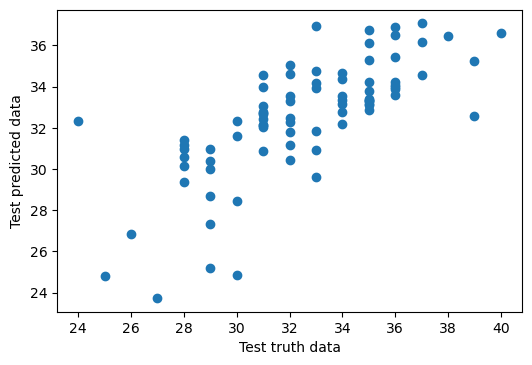

In [63]:
# There should be relation relationship between y_test and y_pred
plt.figure(figsize=(6,4),dpi = 100)
plt.scatter(x = y_test,y = y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

In [64]:
# Residuals should be approximately normally distributed
residuals = y_test - y_pred

In [65]:
residuals.head()

24    -2.042816
6     -1.183733
153   -0.942626
211    1.871975
198    3.419186
Name: Temperature, dtype: float64

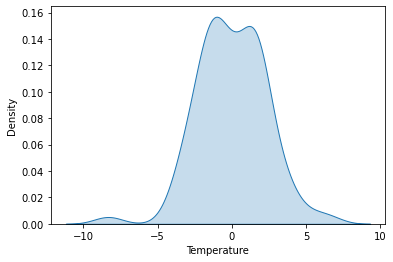

In [66]:
sns.kdeplot(residuals,shade=True)
plt.show()

Text(0, 0.5, 'Residuals')

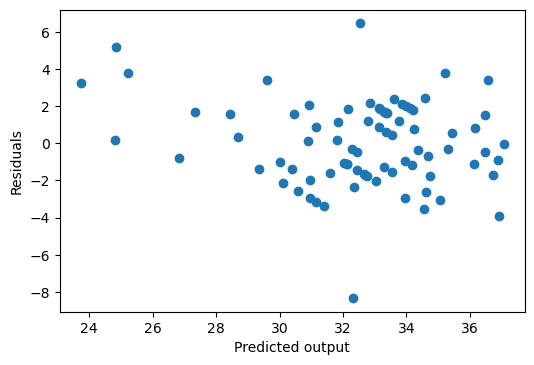

In [67]:
## Plot between predicted values and residuals should be uniforme(no relation)
plt.figure(figsize=(6,4),dpi = 100)
plt.scatter(x= y_pred,y = residuals)
plt.xlabel('Predicted output')
plt.ylabel('Residuals')

In [68]:
# Performance Metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean_absolute_error:', mean_absolute_error(y_test,y_pred))
print('Root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean_absolute_error: 1.829754830802008
Root_mean_squared_error: 2.2822112339203526


In [69]:
## R square and adjusted R square

In [70]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print('R squared score:',score)

adj_score = 1 - (1 - score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R squared score:',adj_score)

R squared score: 0.5150717960749278
Adjusted R squared score: 0.437764401246293


### Ridge Regression

In [71]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0) # choosing hypertuning factor as 10

ridge_model.fit(X_train,y_train)

# getting the coefficients for independent features
coefficients = ridge_model.coef_
print('The coefficients are:',coefficients)
print('-'*30)

# getting intercept for dataset
intercept = ridge_model.intercept_
print('The Intercept is:',intercept)
print('-'*30)

# getting the predicted output
y_pred = ridge_model.predict(X_test)
print('Predicted output values are:',y_pred)
print('-'*30)

The coefficients are: [-1.06044036 -0.48245502  0.10285448  1.76950837  0.44681754  0.43522539
  0.21730663 -0.48758237 -0.0148011  -0.22972883  0.01004977]
------------------------------
The Intercept is: 31.98159509202454
------------------------------
Predicted output values are: [33.03698127 34.13962375 33.92291279 33.14667584 36.55502648 32.58832779
 35.19666748 27.38430161 30.98055686 29.60158713 29.3456983  33.43764977
 33.91193399 33.38908645 34.25371989 32.14884648 36.98194201 25.29344152
 32.24236302 33.52455973 30.87061954 28.43366263 35.03078117 28.68668727
 36.47144965 26.85001439 32.73575897 33.30529993 32.84483309 34.61584372
 34.52177515 31.5918218  32.64397648 33.36109923 32.66573254 33.28197951
 30.34286188 34.26709897 31.80134139 23.79902467 33.61808276 33.77993829
 32.43204163 24.89449146 36.1046481  32.41149461 31.13449632 30.45276627
 35.28731596 34.61529627 36.87392839 30.9229815  30.89485669 34.41579916
 33.8441554  32.24534076 36.86816876 32.32584923 30.1371124

### Evaluation and Performance Metrics

In [72]:
# Evaluation Metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean_absolute_error:', mean_absolute_error(y_test,y_pred))
print('Root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean_absolute_error: 1.8203523741266951
Root_mean_squared_error: 2.2716860422773193


In [73]:
# Performance metrics

from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print('R squared score:',score)

adj_score = 1 - (1 - score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R squared score:',adj_score)

R squared score: 0.5195343040817416
Adjusted R squared score: 0.44293832357303375


#### Ridge regression with cross validation

In [74]:
from sklearn.linear_model import RidgeCV
ridgecv_model = RidgeCV(alphas = (0.1,1.0,10.0))

ridgecv_model.fit(X_train,y_train)

# getting best alpha value 
alpha_value = ridgecv_model.alpha_ 
print('Optimum alpha value is',alpha_value)
print('-'*30)

# getting the coefficients for independent features
coefficients = ridgecv_model.coef_
print('The coefficients are:',coefficients)
print('-'*30)

# getting intercept for dataset
intercept = ridgecv_model.intercept_
print('The Intercept is:',intercept)
print('-'*30)

# getting the predicted output
y_pred = ridgecv_model.predict(X_test)
print('Predicted output values are:',y_pred)
print('-'*30)

Optimum alpha value is 10.0
------------------------------
The coefficients are: [-1.06129231 -0.46353056  0.00581452  1.47749842  0.15874371  0.22651744
  0.23247912  0.01805851  0.00797889 -0.09268034  0.03474011]
------------------------------
The Intercept is: 31.98159509202454
------------------------------
Predicted output values are: [32.99663525 34.03654652 33.89333603 33.17725306 36.46201525 32.46522107
 35.15992326 27.70245245 30.85683588 29.64198075 29.28958654 33.27297764
 33.59839569 33.20991389 34.29127963 32.17134557 36.94708348 25.8585014
 32.18304039 33.49939433 30.64186552 28.5447111  34.89810308 28.81470939
 36.46472542 27.16506189 32.70937051 33.27774424 32.72697672 34.59750181
 34.4342563  31.46312156 32.63210315 33.39719612 32.42820372 33.07189476
 30.16648665 34.29234453 31.47420187 24.34130195 33.59813491 33.76910437
 32.25767132 25.4531185  36.02826772 32.37652619 31.21704221 30.43046925
 35.26761823 34.57907165 36.95421453 30.93127804 30.99664505 34.45371186
 

In [75]:
# Evaluation Metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean_absolute_error:', mean_absolute_error(y_test,y_pred))
print('Root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean_absolute_error: 1.7894111876332874
Root_mean_squared_error: 2.2257243910574647


In [76]:
# Performance metrics

from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print('R squared score:',score)

adj_score = 1 - (1 - score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R squared score:',adj_score)

R squared score: 0.5387795698151749
Adjusted R squared score: 0.4652516751480289


### Lasso Regression (Lasso: Least Absolute Shrinkage and Selection Operator)

In [77]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 0.1)

lasso_model.fit(X_train,y_train)

# getting the coefficients for independent features
coefficients = lasso_model.coef_
print('The coefficients are:',coefficients)
print('-'*30)

# getting intercept for dataset
intercept = lasso_model.intercept_
print('The Intercept is:',intercept)
print('-'*30)

# getting the predicted output
y_pred = lasso_model.predict(X_test)
print('Predicted output values are:',y_pred)
print('-'*30)

The coefficients are: [-1.1147147  -0.33914294 -0.          1.61403791  0.21606476  0.08233736
  0.          0.          0.          0.          0.        ]
------------------------------
The Intercept is: 31.98159509202454
------------------------------
Predicted output values are: [33.07200971 34.11866287 34.07184123 33.1887394  36.17605922 32.28643412
 35.23145847 27.49903808 30.71811796 29.51910213 29.66280233 33.10282481
 33.59795808 33.1012979  34.11387509 32.32629507 36.48949003 25.54647262
 32.27086081 33.64839285 30.79177229 28.52274007 34.88527787 29.01647885
 36.16548855 27.11473292 32.83542018 33.29827809 33.16366987 34.59766448
 34.41031781 31.3682794  32.77818132 33.31284006 32.63189009 33.25846677
 30.37330122 34.40935992 31.26242522 24.7848003  33.60431738 33.84303215
 32.54582209 25.28922568 35.83995845 32.54162048 31.38202216 30.47760313
 35.40822102 34.53792514 36.57255409 31.21135591 31.17518987 34.06939927
 33.78193891 32.2806532  36.59772021 32.42771542 30.3309196

In [78]:
# Evaluation Metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean_absolute_error:', mean_absolute_error(y_test,y_pred))
print('Root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean_absolute_error: 1.8205632210249016
Root_mean_squared_error: 2.2657939536165834


In [79]:
# Performance metrics

from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print('R squared score:',score)

adj_score = 1 - (1 - score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R squared score:',adj_score)

R squared score: 0.522023446597836
Adjusted R squared score: 0.44582428591053447


#### Lasso regression with cross validation

In [80]:
from sklearn.linear_model import LassoCV

lassocv_model = LassoCV(eps =0.01,n_alphas = 100,cv = 5)

lassocv_model.fit(X_train,y_train)

# getting best alpha value 
alpha_value = lassocv_model.alpha_ 
print('Optimum alpha value is',alpha_value)
print('-'*30)

# getting the coefficients for independent features
coefficients = lassocv_model.coef_
print('The coefficients are:',coefficients)
print('-'*30)

# getting intercept for dataset
intercept = lassocv_model.intercept_
print('The Intercept is:',intercept)
print('-'*30)

# getting the predicted output
y_pred = lassocv_model.predict(X_test)# Evaluation Metrics
print('Predicted output values are:',y_pred)
print('-'*30)

Optimum alpha value is 0.10235896894107689
------------------------------
The coefficients are: [-1.11310203 -0.33688367 -0.          1.61408567  0.21699887  0.07922233
  0.          0.          0.          0.          0.        ]
------------------------------
The Intercept is: 31.98159509202454
------------------------------
Predicted output values are: [33.07076454 34.11642809 34.07213125 33.1830374  36.16863432 32.28293102
 35.22939581 27.5012445  30.71670188 29.51881013 29.66977271 33.09801569
 33.5946266  33.09768875 34.11007575 32.32885837 36.48461648 25.54874391
 32.2714488  33.64775064 30.79587942 28.52552511 34.8806416  29.02158135
 36.16307227 27.11866646 32.83390923 33.29593255 33.16616617 34.5983109
 34.40526076 31.36652888 32.7792256  33.3094132  32.6327847  33.25743793
 30.37770276 34.40525362 31.25947546 24.80048658 33.59867608 33.83925139
 32.54753622 25.29397304 35.8355372  32.54282173 31.3861859  30.47885808
 35.40591863 34.53456856 36.56615316 31.21385764 31.1800282

In [81]:
# Evaluation Metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean_absolute_error:', mean_absolute_error(y_test,y_pred))
print('Root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean_absolute_error: 1.820804095105905
Root_mean_squared_error: 2.2659680536565565


In [82]:
# Performance metrics

from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print('R squared score:',score)

adj_score = 1 - (1 - score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R squared score:',adj_score)

R squared score: 0.5219499898441855
Adjusted R squared score: 0.4457391186599252


### Elastic Net

In [83]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha = 0.1, l1_ratio=0.5)

elastic_model.fit(X_train,y_train)

# getting the coefficients for independent features
coefficients = elastic_model.coef_
print('The coefficients are:',coefficients)
print('-'*30)

# getting intercept for dataset
intercept = elastic_model.intercept_
print('The Intercept is:',intercept)
print('-'*30)

# getting the predicted output
y_pred = elastic_model.predict(X_test)
print('Predicted output values are:',y_pred)
print('-'*30)

The coefficients are: [-1.08208414 -0.40968027 -0.          1.46270724  0.19897912  0.15744658
  0.14834719  0.          0.          0.          0.        ]
------------------------------
The Intercept is: 31.98159509202454
------------------------------
Predicted output values are: [33.05055095 34.09220212 33.95693577 33.17181792 36.30658424 32.32260862
 35.17142912 27.67017348 30.77119731 29.62783491 29.42884158 33.09756309
 33.53278768 33.07617105 34.22573385 32.23204183 36.72898571 25.88409638
 32.24936214 33.55230471 30.65388804 28.57598257 34.90633034 28.94328981
 36.31891832 27.24587372 32.79244052 33.304609   32.91735947 34.58295469
 34.44003141 31.38718456 32.71971747 33.37369466 32.46060953 33.10746486
 30.21918649 34.33287199 31.34451076 24.60786071 33.63052093 33.7936814
 32.33310851 25.53659927 35.92247387 32.47494731 31.28958545 30.46065648
 35.30946011 34.53925937 36.76593307 31.09947126 31.07649662 34.29748847
 33.80741253 32.33573154 36.79304443 32.17417035 30.22507558

In [84]:
# Evaluation Metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean_absolute_error:', mean_absolute_error(y_test,y_pred))
print('Root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean_absolute_error: 1.799419534558244
Root_mean_squared_error: 2.231055399776782


In [85]:
# Performance metrics

from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print('R squared score:',score)

adj_score = 1 - (1 - score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R squared score:',adj_score)

R squared score: 0.536567512704915
Adjusted R squared score: 0.46268697125207525
